In [27]:
%reset -f
import ROOT, math

rdf = ROOT.RDataFrame(int(1e5))
rdf = rdf.Define("phi","gRandom->Rndm()*360")
rdf = rdf.Filter("gRandom->Rndm()<(0.5+0.05*cos(phi*TMath::DegToRad())-0.25*cos(2*phi*TMath::DegToRad())) ? 1 : 0")
hfi = rdf.Histo1D(("hfi","",24,0,360),"phi")


85.85333194781768
85.85333194781768 8.732587005904293 -43.115872503610944
8.732587005904293 117.67397501036267 10.884321249377585
-43.115872503610944 10.884321249377585 158.95355997942795
2075.25 9.298857456698645


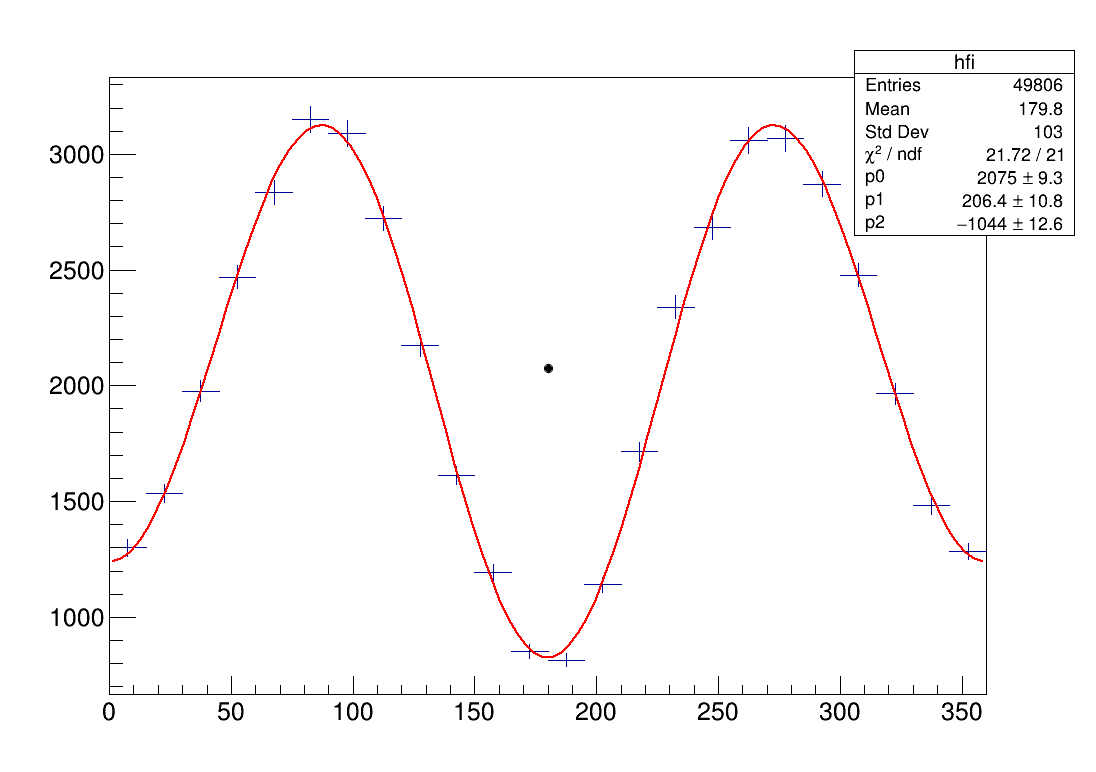

In [42]:
ROOT.gStyle.SetOptFit(1)
c1 = ROOT.TCanvas("c1","c1",1100,800)
c1.Draw()
hfi.Draw("err")
f1 = ROOT.TF1("f1","[0]+[1]*cos(x*TMath::DegToRad())+[2]*cos(2*x*TMath::DegToRad())",0,1)
mm = hfi.Fit(f1,"QLS").GetCovarianceMatrix()
print(mm(0,0))

for i in range(3):
    row = []
    for j in range(3):
        row.append(str(mm(i,j)))
    print(" ".join(row))

nbins = hfi.GetNbinsX()
a = hfi.GetEntries()
da = math.sqrt(a)
print(a/nbins,da/nbins)

gr = ROOT.TGraphErrors()
gr.SetPoint(0, 180, a/nbins)
gr.SetPointError(0, 0, da/nbins)

gr.SetMarkerStyle(20)
gr.Draw("P")

f2 = ROOT.TF1("f2","[0]",0,1)
f2.SetParameter(0,2000)
#hfi.Fit(f2,"QL").Get